In [1]:
from Pricing.GPUCBAgentContinuous import GPUCBAgentContinuous
from Pricing.StochasticPricingEnvironment import StochasticPricingEnvironment
import numpy as np 
import matplotlib.pyplot as plt
import scipy

In [2]:
min_price, max_price = 0, 1
n_customers = 100
cost = 0.1

T = 200

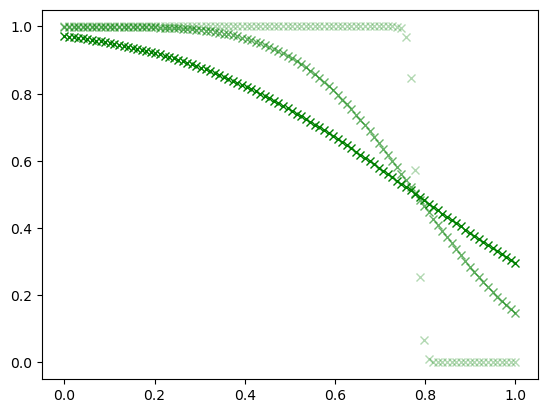

In [3]:
conversion_probability = lambda p,t: scipy.stats.norm.cdf(5*(1-p)-1,0.1,2*(t+5)/T)

for p in np.linspace(0,1,100):
    plt.plot(p, conversion_probability(p, 1), 'x', c = 'g', alpha = 0.3)
for p in np.linspace(0,1,100):
    plt.plot(p, conversion_probability(p, 100), 'x', c = 'g', alpha = 0.6)
for p in np.linspace(0,1,100):
    plt.plot(p, conversion_probability(p, 200), 'x', c='g')
plt.show()

In [4]:
# reward function
def reward_function(price, n_sales):
    return (price-cost)*n_sales
maximum_profit = reward_function(max_price, n_customers)

# profit curve
def profit_curve(price, t):
    return reward_function(price, n_customers*conversion_probability(price, t))

In [5]:
expected_clairvoyant_rewards = []
middle_rewards = []

for t in range(T):
    def wrap(price):
        return 1/profit_curve(price, t)
    best_price = scipy.optimize.minimize(wrap, x0 = 0.5, bounds = [(0,1)])
    print(f'Optimization procedure ended with success: {best_price.success}, Best price at time {t} = {best_price.x[0]}')
    middle_rewards.append(profit_curve(0.5, t))
    expected_clairvoyant_rewards.append(profit_curve(best_price.x[0], t))

Optimization procedure ended with success: True, Best price at time 0 = 0.7544393125413691
Optimization procedure ended with success: True, Best price at time 1 = 0.7502153409569638
Optimization procedure ended with success: True, Best price at time 2 = 0.7461620856212243
Optimization procedure ended with success: True, Best price at time 3 = 0.742254860512676
Optimization procedure ended with success: True, Best price at time 4 = 0.7384788323530949
Optimization procedure ended with success: True, Best price at time 5 = 0.7348271405159447
Optimization procedure ended with success: True, Best price at time 6 = 0.7312878250926236
Optimization procedure ended with success: True, Best price at time 7 = 0.727854210413208
Optimization procedure ended with success: True, Best price at time 8 = 0.7245209588887339
Optimization procedure ended with success: True, Best price at time 9 = 0.72128259908029
Optimization procedure ended with success: True, Best price at time 10 = 0.7181321961188308
Op

Optimization procedure ended with success: True, Best price at time 157 = 0.6601733041922178
Optimization procedure ended with success: True, Best price at time 158 = 0.6610252749264307
Optimization procedure ended with success: True, Best price at time 159 = 0.6618839261977094
Optimization procedure ended with success: True, Best price at time 160 = 0.6627491545820154
Optimization procedure ended with success: True, Best price at time 161 = 0.6636208703757985
Optimization procedure ended with success: True, Best price at time 162 = 0.664544653677537
Optimization procedure ended with success: True, Best price at time 163 = 0.6654321303890598
Optimization procedure ended with success: True, Best price at time 164 = 0.6663259513970041
Optimization procedure ended with success: True, Best price at time 165 = 0.6672260338097076
Optimization procedure ended with success: True, Best price at time 166 = 0.6681322823686922
Optimization procedure ended with success: True, Best price at time 167

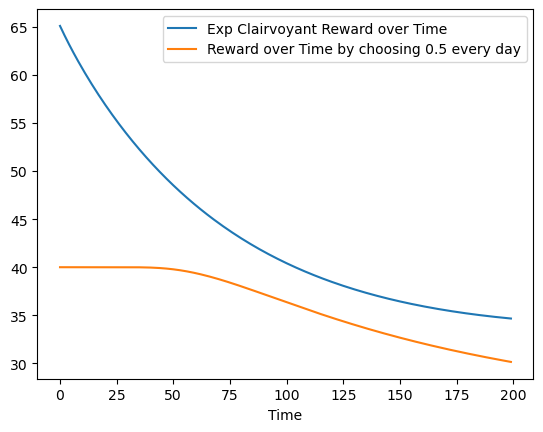

In [6]:
plt.plot(range(T), expected_clairvoyant_rewards, label='Exp Clairvoyant Reward over Time')
plt.plot(range(T), middle_rewards, label='Reward over Time by choosing 0.5 every day')
plt.xlabel('Time')
plt.legend()

In [7]:
# initialize agennt and environment
gp_agent = GPUCBAgent(T)
env = StochasticPricingEnvironment(conversion_probability=conversion_probability, cost=cost)
gp_agent_rewards = np.array([])
for t in range(T):
    p_t = gp_agent.pull_arm()
    d_t, r_t = env.round(p_t, n_t=n_customers)
    gp_agent.update(r_t/n_customers)
    gp_agent_rewards = np.append(gp_agent_rewards, r_t)
    print(f"day: {t}")
    print(f"price: {p_t}")
    print(f"revenue: {r_t}")
    print("----------------------------")

day: 0
price: 0.5
revenue: 40.0
----------------------------
day: 1
price: 0.5
revenue: 40.0
----------------------------
day: 2
price: 0.5
revenue: 40.0
----------------------------
day: 3
price: 1.0
revenue: 0.0
----------------------------
day: 4
price: 0.0
revenue: -10.0
----------------------------
day: 5
price: 0.5830224223513435
revenue: 48.30224223513435
----------------------------
day: 6
price: 0.613766162641937
revenue: 51.3766162641937
----------------------------
day: 7
price: 0.6329900954772183
revenue: 53.29900954772183
----------------------------
day: 8
price: 0.6447713746511438
revenue: 54.47713746511438
----------------------------
day: 9
price: 0.6524137253164234
revenue: 55.24137253164234
----------------------------
day: 10
price: 0.6577143467830486
revenue: 55.771434678304864
----------------------------
day: 11
price: 0.6616036497923538
revenue: 56.160364979235375
----------------------------
day: 12
price: 0.6645950994115447
revenue: 56.45950994115447
---------

day: 101
price: 0.6598195844543415
revenue: 38.627551327349565
----------------------------
day: 102
price: 0.6598385854072907
revenue: 42.54773249095409
----------------------------
day: 103
price: 0.6598124292026117
revenue: 37.507432756574985
----------------------------
day: 104
price: 0.6598111534333181
revenue: 40.306403047198906
----------------------------
day: 105
price: 0.6598073990124188
revenue: 40.865940127906576
----------------------------
day: 106
price: 0.6598064510810077
revenue: 42.545290282156586
----------------------------
day: 107
price: 0.6598167789981518
revenue: 35.82827385588172
----------------------------
day: 108
price: 0.6598011191758164
revenue: 35.267470508076435
----------------------------
day: 109
price: 0.6598076739479022
revenue: 43.10519089398847
----------------------------
day: 110
price: 0.6598003711190701
revenue: 36.387024122739554
----------------------------
day: 111
price: 0.6597992984807934
revenue: 43.1045459830211
----------------------

day: 195
price: 0.6598310875393494
revenue: 34.149696339900316
----------------------------
day: 196
price: 0.659788636313681
revenue: 31.348163633566138
----------------------------
day: 197
price: 0.6598118342283641
revenue: 34.14852188793021
----------------------------
day: 198
price: 0.659766190240417
revenue: 34.14573760466544
----------------------------
day: 199
price: 0.6598129030216784
revenue: 31.909335472235668
----------------------------


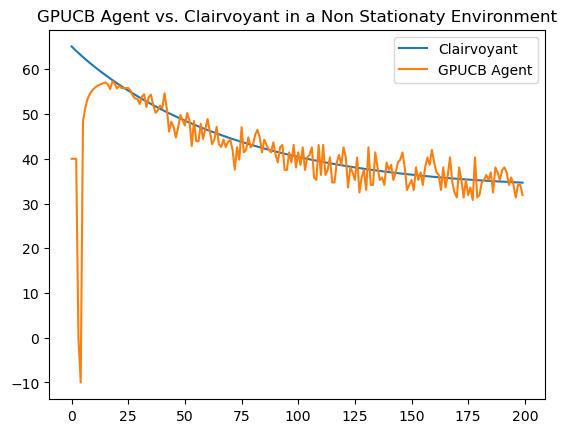

In [9]:
plt.plot(range(T), expected_clairvoyant_rewards, label='Clairvoyant')
plt.plot(range(T), gp_agent_rewards, label='GPUCB Agent')
plt.title('GPUCB Agent vs. Clairvoyant in a Non Stationaty Environment')
plt.legend()